In [1]:
##This is to plot the aF collection experiments
#Setting matplotlib to be inline
%matplotlib inline

#Importing the necessary libraries
from os import listdir
from os.path import isfile, join

import re
import csv

import pandas as pd

import FlowCytometryTools
from FlowCytometryTools import FCMeasurement

from pylab import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
from scipy.stats import ttest_ind

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
###
#These are functions to be used here.
###
##Function to change bar plot's bar width.
def change_barwidth(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [3]:
#Set the root directory
root_dir = '.';

#Printing file list
fileList = [f for f in listdir(root_dir) if f.endswith(".csv")]
print("Data files:")
print("\n".join(fileList))

Data files:
FromPaperFromTree_Yarrowia_CAAX-Asn_CVIA-best_pairID.csv
ML16507_Pher-deletion-genotypes_190921.csv
ML16507_Pher-deletions_190507.csv
ML16507_Pher-deletions_190921.csv
Ylipo_filter-mating.csv
Ylipo_filter-mating_181211-v2.csv
Ylipo_filter-mating_181211.csv
Ylipo_filter-mating_190423.csv
Ylipo_filter-mating_190917.csv
Ylipo_filter-mating_190921.csv
Ylipo_filter-mating_191029.csv
Ylipo_TransExpr_180802.csv
Ylipo_TransExpr_191212.csv


In [4]:
TransExprRaw = pd.read_csv('Ylipo_TransExpr_191212.csv')
print(TransExprRaw)

             Sample  Norm. Singlets/Median old  Norm. Singlets/Median new
0            YlSte6                      164.5                      144.5
1            YlSte6                      147.5                      127.5
2            ScSte6                       47.5                       27.5
3            ScSte6                       38.5                       18.5
4     TM4-6/clone A                       84.5                       64.5
5     TM4-6/clone A                      109.5                       89.5
6     TM4-6/clone B                       18.5                       -1.5
7     TM4-6/clone B                       83.5                       63.5
8   TM10-12/clone C                       56.5                       36.5
9   TM10-12/clone C                      122.5                      102.5
10  TM10-12/clone D                       95.5                       75.5
11  TM10-12/clone D                      142.5                      122.5


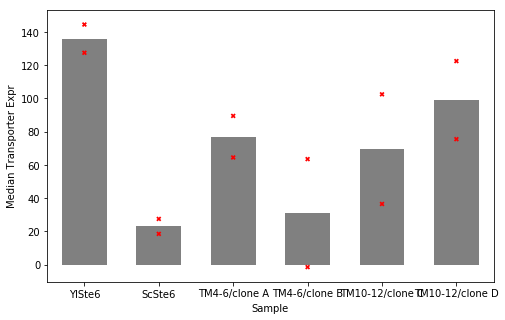

In [49]:
##Plotting the data.
figure(figsize=(8,5))
ax1 = sns.barplot(x="Sample", y="Norm. Singlets/Median new", data=TransExprRaw, color="grey", ci=None)
ax1 = sns.swarmplot(x="Sample", y="Norm. Singlets/Median new", data=TransExprRaw, color="red", marker='X')
ax1.set_ylabel('Median Transporter Expr')
change_barwidth(ax1, .6)

#savefig('Ylipo_TransExpr_191212.pdf', dpi=300, transparent=True)

In [6]:
##Plotting the data.
figure(figsize=(12,5))
ax4 = sns.barplot(x="Sample", y="aFexport", data=plotData_180424, color="black", ci=None)
ax4 = sns.swarmplot(x="Sample", y="aFexport", data=plotData_180424, color="red", marker='X')
ax4.yaxis.set_ticks(np.arange(0, 5, 1));
ax4.set_ylabel('aF exported/cell [$log_{10}$ units]')
#plt.xticks(rotation=70)
change_barwidth(ax4, .3)

#savefig('aF-collection_all-mutants_180424.pdf', dpi=300, transparent=True)

NameError: name 'plotData_180424' is not defined

<Figure size 864x360 with 0 Axes>

## Below is to try and analyze the (.fcs) files directly.

In [5]:
#Set the data directory
root_dir = '.';
data_dir = '/FACS-Expr';

#Pick a test data file
data_file = root_dir+data_dir
#print(root_dir+data_dir)

#Printing file list
fileList = [f for f in listdir(root_dir+data_dir) if f.endswith(".fcs")]
print("\n".join(fileList))

NewGrowth 4hr_E05973-8369 yali005 01.fcs
NewGrowth 4hr_E05973-8369 yali005 02.fcs
NewGrowth 4hr_E05973-B11-8369 yali005 01.fcs
NewGrowth 4hr_E05973-B11-8369 yali005 02.fcs
NewGrowth 4hr_E05973-tmh10-12-D1-8369 yali005 01.fcs
NewGrowth 4hr_E05973-tmh10-12-D1-8369 yali005 02.fcs
NewGrowth 4hr_E05973-tmh10-12-D11-8369 yali005 01.fcs
NewGrowth 4hr_E05973-tmh10-12-D11-8369 yali005 02.fcs
NewGrowth 4hr_E05973-tmh4-6-C9-8369 yali005 01.fcs
NewGrowth 4hr_E05973-tmh4-6-C9-8369 yali005 02.fcs
NewGrowth 4hr_ML16507.fcs
NewGrowth 4hr_PMB8369 yali005 01.fcs
NewGrowth 4hr_PMB8369 yali005 02.fcs
NewGrowth 4hr_ste6-8369 yali005 01.fcs
NewGrowth 4hr_ste6-8369 yali005 02.fcs
NewGrowth 4hr_yali005.fcs


In [6]:
#Starting with just a few files to work out the data handling
YlSte6_01 = FCMeasurement(ID='YlSte6', 
                        datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-8369 yali005 01.fcs')
YlSte6_02 = FCMeasurement(ID='YlSte6', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-8369 yali005 02.fcs')
ScSte6_01 = FCMeasurement(ID='ScSte6', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_ste6-8369 yali005 01.fcs')
ScSte6_02 = FCMeasurement(ID='ScSte6', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_ste6-8369 yali005 02.fcs')
TM46cloneA_01 = FCMeasurement(ID='TM4-6/cloneA', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-B11-8369 yali005 01.fcs')
TM46cloneA_02 = FCMeasurement(ID='TM4-6/cloneA', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-B11-8369 yali005 02.fcs')
TM46cloneB_01 = FCMeasurement(ID='TM4-6/cloneB', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-tmh4-6-C9-8369 yali005 01.fcs')
TM46cloneB_02 = FCMeasurement(ID='TM4-6/cloneB', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-tmh4-6-C9-8369 yali005 02.fcs')
TM1012cloneC_01 = FCMeasurement(ID='TM10-12/cloneC', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-tmh10-12-D1-8369 yali005 01.fcs')
TM1012cloneC_02 = FCMeasurement(ID='TM10-12/cloneC', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-tmh10-12-D1-8369 yali005 02.fcs')
TM1012cloneD_01 = FCMeasurement(ID='TM10-12/cloneD', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-tmh10-12-D11-8369 yali005 01.fcs')
TM1012cloneD_02 = FCMeasurement(ID='TM10-12/cloneD', 
                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-tmh10-12-D11-8369 yali005 02.fcs')

NegCtrl = FCMeasurement(ID='Null', 
                        datafile=root_dir+data_dir+'/NewGrowth 4hr_yali005.fcs')
NegCtrl_01 = FCMeasurement(ID='Empty', 
                        datafile=root_dir+data_dir+'/NewGrowth 4hr_PMB8369 yali005 01.fcs')

print(YlSte6_01.channel_names)

('FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'FITC-A', 'FITC-H', 'PE-Texas Red-A', 'PE-Texas Red-H', 'Time')


C:\Users\saisr\Anaconda3\lib\site-packages\matplotlib\colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


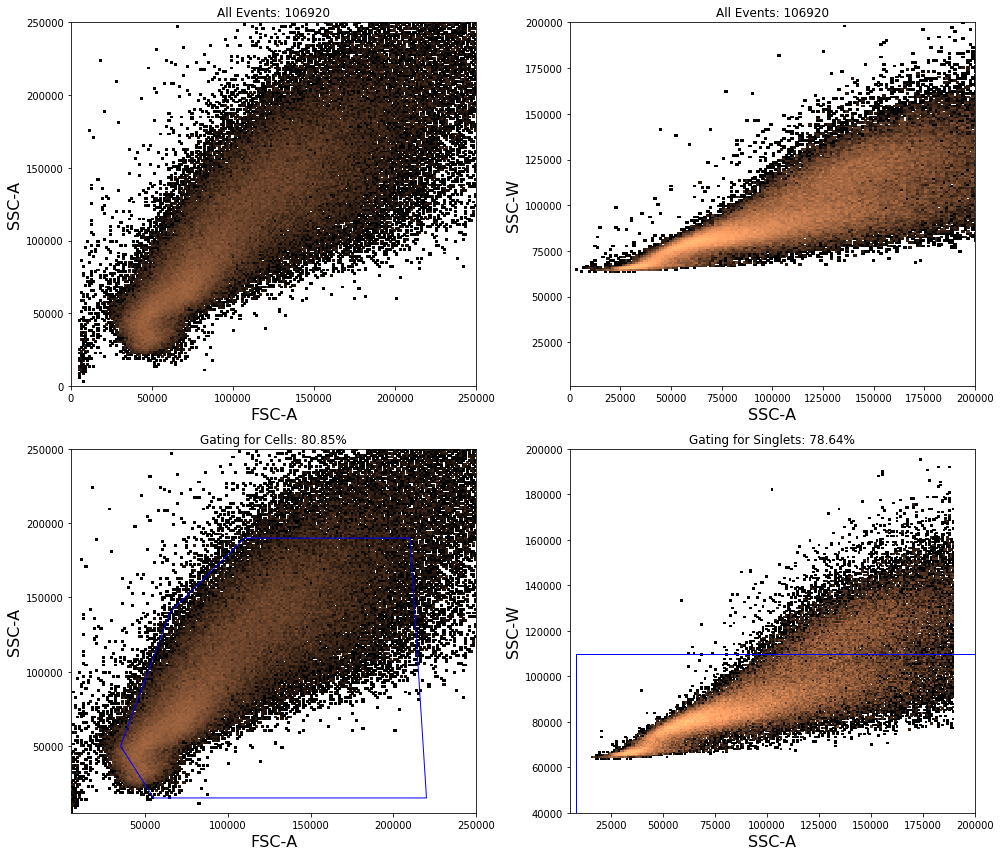

In [7]:
#This is to setup the initial gating I will be doing.
from FlowCytometryTools import ThresholdGate, PolyGate
#This is for data from the Aria, populations that are being sorted
cellsGate = PolyGate([(35000,50000), (65000,140000), (110000,190000), (210000,190000), 
                      (220000,15000), (55000,15000)], ['FSC-A','SSC-A'], region='in', 
                     name='Yeast cells')
singletsGate = PolyGate([(8256,8738), (8256,110000), (200000,110000), (200000,8738)], 
                        ['SSC-A','SSC-W'], region='in', name='Singlets')
#This is specifically for data from the Fortessa
#cellsGate = PolyGate([(23737,17000), (58827,242285), (249760,231362), (227054,17000)], 
#                     ['FSC-A','SSC-A'], region='in', name='Yeast cells')
#singletsGate = PolyGate([(8256,8738), (8256,88850), (252856,88850), (252856,8738)], 
#                        ['SSC-A','SSC-W'], region='in', name='Singlets')

YlSte6_01_Cells = YlSte6_01.gate(cellsGate)
YlSte6_01_Singlets = YlSte6_01_Cells.gate(singletsGate)
#print("The gated events as cells are: ", 
#(100*galE05973_Cells.get_data().shape[0]/galE05973.get_data().shape[0]))
#print("The gated events as singlets are: ", 
#(100*galE05973_Singlets.get_data().shape[0]/galE05973_Cells.get_data().shape[0]))

#I am going to be plotting these in the figures above, and in particular the Singlets 
#are gated on the Yeast Cell population.
figure(figsize=(14,12))
ax1 = subplot(221)
YlSte6_01.plot(['FSC-A','SSC-A'], kind='histogram');
title('All Events: {}'.format(YlSte6_01.get_data().shape[0]));
xlim((0,250000))
ylim((0,250000))
ax2 = subplot(222)
YlSte6_01.plot(['SSC-A','SSC-W'], kind='histogram');
title('All Events: {}'.format(YlSte6_01.get_data().shape[0]));
xlim((0,200000))
ylim((1000,200000))
ax3 = subplot(223)
YlSte6_01.plot(['FSC-A','SSC-A'], kind='histogram', gates=[cellsGate]);
title('Gating for Cells: {0:.2f}%'.format
      (100*YlSte6_01_Cells.get_data().shape[0]/YlSte6_01.get_data().shape[0]));
xlim((5000,250000))
ylim((5000,250000))
ax2 = subplot(224)
YlSte6_01_Cells.plot(['SSC-A','SSC-W'], kind='histogram', gates=[singletsGate]);
title('Gating for Singlets: {0:.2f}%'.format
      (100*YlSte6_01_Singlets.get_data().shape[0]/YlSte6_01_Cells.get_data().shape[0]));
xlim((5000,200000))
ylim((40000,200000))
plt.tight_layout()

#savefig('test.png')

In [8]:
##These are all the functions 
#These are functions to plot the sub-sampled medians to get a 95% confidence interval 
##on the median
def sampledMedianGFP(well):
    """Calculates the median FITC-A fluorescence of events from FACS and provides a 
    95% confidence interval by using a sub-sampling to calculate the Median"""
    medianList = []
    for iterCount in range(0, 100):
                data = well.data['FITC-A'].sample(75000)
                medianList.append(data.median())
                #data = well.subsample(90000, order='random', auto_resize=True).get_data()
                #medianList.append(data.median())
    medianPandas = pd.DataFrame(medianList)
    return medianPandas
    #return medianPandas[0].mean(), 2*medianPandas[0].std()

def sampledMedianRFP(well):
    """Calculates the median PE-Texas Red-A fluorescence of events from FACS and provides a 
    95% confidence interval by using a sub-sampling to calculate the Median"""
    medianList = []
    for iterCount in range(0, 100):
                data = well.data['PE-Texas Red-A'].sample(75000)
                medianList.append(data.median())
                #data = well.subsample(90000, order='random', auto_resize=True).get_data()
                #median.append(data['PE-Texas Red-A'].median())
    medianPandas = pd.DataFrame(medianList)
    return medianPandas
    #return medianPandas[0].mean(), 2*medianPandas[0].std()

#This is the function to apply the gating to the various samples.
def singletCellGating(well):
    """Applies the gates that have been defined above as cellsGate and singletsGate"""
    Cells = well.gate(cellsGate)
    Singlets = Cells.gate(singletsGate)
    return Singlets

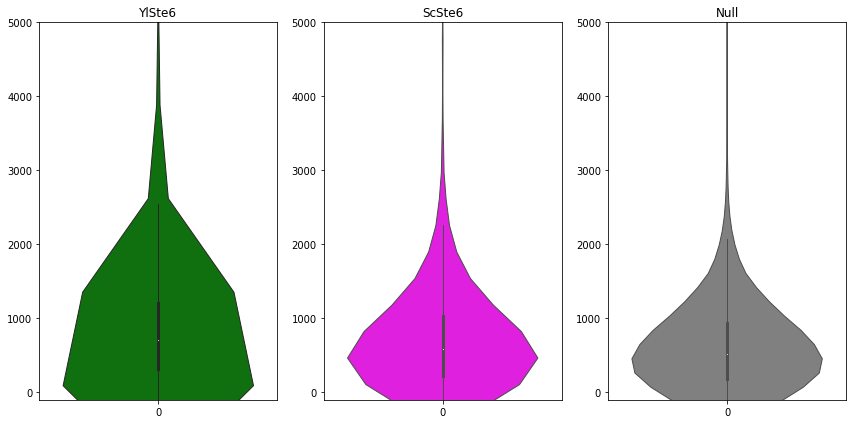

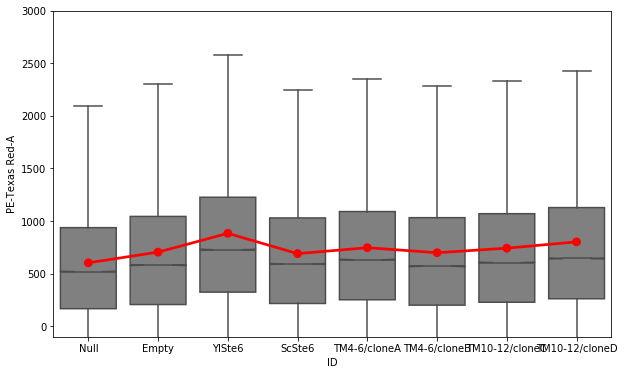

In [18]:
#fitcData = ({finalRafE05973.ID, finalRafE05973.data['FITC-A']}, 
#            {finalGalE05973.ID, finalGalE05973.data['FITC-A']}, 
#            {finalGalSte6.ID, finalGalSte6.data['FITC-A']})
#print(len(fitcData))
finalYlSte6_01 = YlSte6_01.apply(singletCellGating)
finalYlSte6_02 = YlSte6_02.apply(singletCellGating)
finalScSte6_01 = ScSte6_01.apply(singletCellGating)
finalScSte6_02 = ScSte6_02.apply(singletCellGating)
finalTM46cloneA_01 = TM46cloneA_01.apply(singletCellGating)
finalTM46cloneA_02 = TM46cloneA_02.apply(singletCellGating)
finalTM46cloneB_01 = TM46cloneB_01.apply(singletCellGating)
finalTM46cloneB_02 = TM46cloneB_02.apply(singletCellGating)
finalTM1012cloneC_01 = TM1012cloneC_01.apply(singletCellGating)
finalTM1012cloneC_02 = TM1012cloneC_02.apply(singletCellGating)
finalTM1012cloneD_01 = TM1012cloneD_01.apply(singletCellGating)
finalTM1012cloneD_02 = TM1012cloneD_02.apply(singletCellGating)
finalNegCtrl = NegCtrl.apply(singletCellGating)
finalNegCtrl_01 = NegCtrl_01.apply(singletCellGating)

finalYlSte6_01_Data = (finalYlSte6_01.data[['PE-Texas Red-A']])
finalYlSte6_01_Data.insert(0, 'ID', finalYlSte6_01.ID)
finalScSte6_01_Data = (finalScSte6_01.data[['PE-Texas Red-A']])
finalScSte6_01_Data.insert(0, 'ID', finalScSte6_01.ID)
finalTM46cloneA_01_Data = (finalTM46cloneA_01.data[['PE-Texas Red-A']])
finalTM46cloneA_01_Data.insert(0, 'ID', finalTM46cloneA_01.ID)
finalTM46cloneB_01_Data = (finalTM46cloneB_01.data[['PE-Texas Red-A']])
finalTM46cloneB_01_Data.insert(0, 'ID', finalTM46cloneB_01.ID)
finalTM1012cloneC_01_Data = (finalTM1012cloneC_01.data[['PE-Texas Red-A']])
finalTM1012cloneC_01_Data.insert(0, 'ID', finalTM1012cloneC_01.ID)
finalTM1012cloneD_01_Data = (finalTM1012cloneD_01.data[['PE-Texas Red-A']])
finalTM1012cloneD_01_Data.insert(0, 'ID', finalTM1012cloneD_01.ID)
finalNegCtrl_Data = (finalNegCtrl.data[['PE-Texas Red-A']])
finalNegCtrl_Data.insert(0, 'ID', finalNegCtrl.ID)
finalNegCtrl_01_Data = (finalNegCtrl_01.data[['PE-Texas Red-A']])
finalNegCtrl_01_Data.insert(0, 'ID', finalNegCtrl_01.ID)


plotData = pd.concat([finalNegCtrl_Data, finalNegCtrl_01_Data, finalYlSte6_01_Data, finalScSte6_01_Data, finalTM46cloneA_01_Data, finalTM46cloneB_01_Data, finalTM1012cloneC_01_Data, 
                     finalTM1012cloneD_01_Data])
meltedPlotData = pd.melt(plotData, "ID", var_name="measurement")
#print(plotData)

figure(figsize=(12,6))
ax1 = subplot(131)
ylim((-100,5000));
sns.violinplot(data=finalYlSte6_01.data['PE-Texas Red-A'].values[:20000], color="green", 
               bw=.2, cut=1, linewidth=1);
title(finalYlSte6_01.ID);
ax2 = subplot(132)
ylim((-100,5000));
sns.violinplot(data=finalScSte6_01.data['PE-Texas Red-A'].values[:20000], color="magenta", 
               bw=.2, cut=1, linewidth=1)
title(finalScSte6_01.ID);
ax2 = subplot(133)
ylim((-100,5000));
sns.violinplot(data=finalNegCtrl.data['PE-Texas Red-A'].values[:20000], color="grey", 
               bw=.2, cut=1, linewidth=1)
title(finalNegCtrl.ID);
plt.tight_layout()
#savefig('Control-FITC_violin.eps')

fig2 = figure(figsize=(10,6))
ylim((-100,3000));
sns.boxplot(x='ID', y='PE-Texas Red-A', color="grey", data=plotData, showfliers=False, notch=True)
sns.pointplot(x='ID', y='PE-Texas Red-A', color="red", data=plotData, ci=95)
#sns.violinplot(x='ID', y='PE-Texas Red-A', color="blue", data=plotData)
#sns.violinplot(x='ID', y='PE-Texas Red-A', data=plotData)

#savefig('Ylipo_TransExpr_boxplot_180802.pdf', dpi=300, transparent=True)

In [23]:
statistic, pvalue = ttest_ind(finalNegCtrl_01_Data['PE-Texas Red-A'].values, finalTM1012cloneD_01_Data['PE-Texas Red-A'].values, equal_var=False)
print(statistic, pvalue)
print(finalNegCtrl_01_Data['PE-Texas Red-A'].median(), finalScSte6_01_Data['PE-Texas Red-A'].median())

-16.701797433403797 1.4849965567566221e-62
581.2799682617188 592.199951171875


In [14]:
medianListRaw = []
for f in fileList:
    FACS = FCMeasurement(ID=f.split(".")[0].split(" ")[1].split("_")[1], datafile=root_dir+data_dir+"/"+f)
    finalFACS = FACS.apply(singletCellGating)
    #finalFACS = FACS.gate(cellsGate)
    #finalFACS = FACS
    
    #print(f.split(".")[0].split(" ")[1].split("_")[1], finalFACS['PE-Texas Red-A'].median())
    medianListRaw.append([f.split(".")[0].split(" ")[1].split("_")[1], finalFACS['PE-Texas Red-A'].median()])


medianList = pd.DataFrame.from_records(medianListRaw, columns=["ID", "TransporterExpr"])
medianList


,ID,TransporterExpr
0,E05973-8369,727.440002
1,E05973-8369,696.359985
2,E05973-B11-8369,632.519958
3,E05973-B11-8369,654.359985
4,E05973-tmh10-12-D1-8369,604.799988
5,E05973-tmh10-12-D1-8369,668.639954
6,E05973-tmh10-12-D11-8369,644.279968
7,E05973-tmh10-12-D11-8369,698.880005
8,E05973-tmh4-6-C9-8369,571.200012
9,E05973-tmh4-6-C9-8369,629.159973


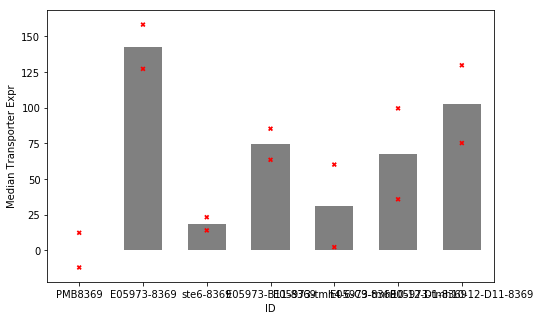

In [15]:
plotOrder = ["PMB8369", "E05973-8369", "ste6-8369", "E05973-B11-8369", "E05973-tmh4-6-C9-8369", "E05973-tmh10-12-D1-8369", "E05973-tmh10-12-D11-8369"]

medianList['NormTransporterExpr'] = medianList.apply(lambda row: row['TransporterExpr'] - medianList.groupby(['ID']).get_group("PMB8369")["TransporterExpr"].mean(), axis = 1)

figure(figsize=(8,5))
ax1 = sns.barplot(x="ID", y="NormTransporterExpr", data=medianList, order=plotOrder, color="grey", ci=None)
ax1 = sns.swarmplot(x="ID", y="NormTransporterExpr", data=medianList, order=plotOrder, color="red", marker='X')
ax1.set_ylabel('Median Transporter Expr')
change_barwidth(ax1, .6)

#savefig('Ylipo_TransExpr_Python_191212.pdf', dpi=300, transparent=True)